In [4]:
import simexpal
import yaml

cfg = simexpal.config_for_dir()

results = []
for run in cfg.collect_successful_results():
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)
    
for r in results:
    r['instance'] = r['instance'].rsplit('/',1)[1]
    r['instance'] = r['instance'].split('.',1)[0]


for r in sorted(results, key=lambda r: (r['threads'])):
    print('Threads {} algorithm {}  instance {} and takes: {} ms'.format(
          r['threads'], r['algorithm'], r['instance'], r['time_sssp']))

Threads 1 algorithm delta  instance cit-patent and takes: 5117 ms
Threads 1 algorithm delta  instance roadNet-TX and takes: 55 ms
Threads 1 algorithm delta-const  instance cit-patent and takes: 5038 ms
Threads 1 algorithm delta-const  instance roadNet-TX and takes: 3 ms
Threads 2 algorithm delta  instance cit-patent and takes: 5144 ms
Threads 2 algorithm delta  instance roadNet-TX and takes: 16 ms
Threads 2 algorithm delta-const  instance cit-patent and takes: 5056 ms
Threads 2 algorithm delta-const  instance roadNet-TX and takes: 8 ms
Threads 4 algorithm delta  instance cit-patent and takes: 5069 ms
Threads 4 algorithm delta  instance roadNet-TX and takes: 73 ms
Threads 4 algorithm delta-const  instance cit-patent and takes: 5078 ms
Threads 4 algorithm delta-const  instance roadNet-TX and takes: 13 ms
Threads 8 algorithm delta  instance cit-patent and takes: 5116 ms
Threads 8 algorithm delta  instance roadNet-TX and takes: 125 ms
Threads 8 algorithm delta-const  instance cit-patent an

In [13]:
import itertools

num_threads = sorted( map((lambda r: r['threads']), results))
num_threads = [k for k, g in itertools.groupby(num_threads)]
print(num_threads)

time_delta_cit = sorted( map(lambda r: (r['time_sssp']),\
                          filter(lambda r: (r['algorithm'] == 'delta' and r['instance'] == 'cit-patent'), results)))
time_delta_const_cit = sorted( map(lambda r: (r['time_sssp']),\
                          filter(lambda r: (r['algorithm'] == 'delta-const' and r['instance'] == 'cit-patent'), results)))

time_delta_road = sorted( map(lambda r: (r['time_sssp']),\
                          filter(lambda r: (r['algorithm'] == 'delta' and r['instance'] == 'roadNet-TX'), results)))
time_delta_const_road = sorted( map(lambda r: (r['time_sssp']),\
                          filter(lambda r: (r['algorithm'] == 'delta-const' and r['instance'] == 'roadNet-TX'), results)))



[1, 2, 4, 8, 16, 32, 64]


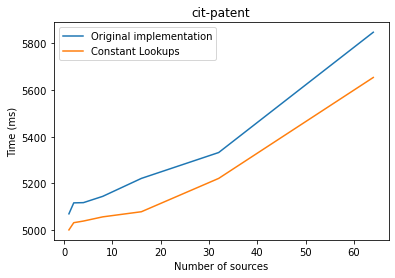

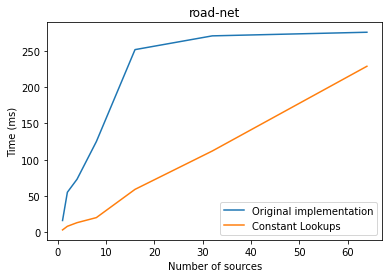

In [17]:
import matplotlib.pyplot as plt
fig, plts = plt.subplots()
plts.plot(num_threads, time_delta_cit, label='Original implementation')
plts.plot(num_threads, time_delta_const_cit, label='Constant Lookups')
plts.legend()
#plts.set_ylim(ymin=0)
#plts.set_title('Strong scalability')
plts.set_ylabel('Time (ms)')
plts.set_xlabel('Number of sources')
plts.set_title('cit-patent')
#plts.set_xscale('log')
#plts.set_xticks([1, 2, 4, 8, 16, 32, 64])
#plts.set_xticklabels([1, 2, 4, 8, 16, 32, 64])
plt.savefig('plot-compare-delta-cit-patent.pdf', bbox_inches='tight')


fig2, plts2 = plt.subplots()
plts2.plot(num_threads, time_delta_road, label='Original implementation')
plts2.plot(num_threads, time_delta_const_road, label='Constant Lookups')
plts2.legend()
#plts.set_ylim(ymin=0)
#plts.set_title('Strong scalability')
plts2.set_ylabel('Time (ms)')
plts2.set_xlabel('Number of sources')
plts2.set_title('road-net')
#plts.set_xscale('log')
#plts.set_xticks([1, 2, 4, 8, 16, 32, 64])
#plts.set_xticklabels([1, 2, 4, 8, 16, 32, 64])
plt.savefig('plot-compare-delta-road-net.pdf', bbox_inches='tight')